In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import cv2
import imutils
from glob import glob
import imgaug as ia
from imgaug import augmenters as iaa

In [2]:
data_dir="data" # Directory that will contain all kinds of data (the data we download and the data we generate)

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

# imgW,imgH: dimensions of the generated dataset images 
imgW=720
imgH=720
bg_image_pickle_file = "bg_images.pkl"

In [3]:
bg_dir="raw_data/background_images"
bg_images=[]
for subdir in glob(bg_dir+"/*"):
    for f in glob(subdir+"/*.jpg"):
        bg_images.append(mpimg.imread(f))
print("Nb of images loaded :",len(bg_images))

Nb of images loaded : 2040


In [4]:
fileobj = open(bg_image_pickle_file, "wb")
pickle.dump(bg_images, fileobj)
fileobj.close()

In [3]:
class Backgrounds():
    def __init__(self,bg_images):
        self._images=bg_images
        self._nb_images=len(self._images)
        print("Nb of images loaded :", self._nb_images)
    def get_random(self, display=False):
        bg=self._images[random.randint(0,self._nb_images-1)]
        if display: plt.imshow(bg)
        return bg

In [4]:
fileobj = open(bg_image_pickle_file,'rb')
bg_images =  pickle.load(fileobj)
fileobj.close()

Nb of images loaded : 2040


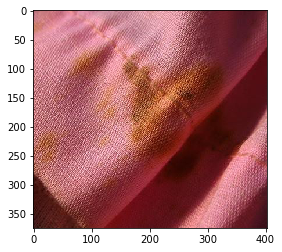

In [5]:
backgrounds = Backgrounds(bg_images)
_=backgrounds.get_random(display=True)

In [6]:
scaleBg=iaa.Resize({"height": imgH, "width": imgW})

In [7]:
def img_read(img_file):
    img = cv2.imread(img_file,cv2.IMREAD_UNCHANGED)
    *_, alpha = cv2.split(img)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = np.dstack([rgb, alpha])
    return result

In [8]:
def resize_image(img, scale_percent):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [9]:
def overlay_transparent(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]
    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]
    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )
    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0
    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background

In [10]:
scale_final_img =iaa.Resize({"height": 720, "width": 720})
def gen_image(image, filename, backgrounds_class):
    pos_x = random.randint(0,(imgW//2))
    pos_y = random.randint(0,(imgH//2))
    rotate = random.randint(0, 360)
    image = imutils.rotate_bound(image, rotate)
    bg_image = scaleBg.augment_image(backgrounds_class.get_random())
#     print(f"pos_x: {pos_x} || pos_y: {pos_y} || angel: {rotate} || {filename}")
    new_image = overlay_transparent(bg_image, image, pos_x,pos_y)
    new_image = scale_final_img.augment_image(new_image)
    plt.imsave(filename,new_image)

In [11]:
def nth_image_generate(img, n, scale_per, filepath, bg_class):
    resized = resize_image(img,scale_per)
    for k in range(n):
        gen_image(resized, f"{filepath}_{k}.jpg", bg_class)

In [12]:
def remove_file(path):
    os.remove(path)

In [18]:
delete_count = 0
for subdir in glob(data_dir+'/*'):
    for catdir in glob(subdir+'/*'):
        for f in glob(catdir+"/*.jpg"):
            remove_file(f)
            delete_count+=1
print("Total deleted :",delete_count)

Total deleted : 0


In [17]:
CATEGORIES = []
scale = 50
for subdir in glob(data_dir+'/*'):
    for cat in glob(subdir+'/*'):
        for f in glob(cat+"/*.png"):
            prefix = cat.replace(subdir+'/', "")
            CATEGORIES.append(prefix)
            filepath = f"{cat}/{prefix.lower().replace(' ', '_')}"
            img = img_read(f)
            nth_image_generate(img, 0, scale, filepath, backgrounds)
print("Nb of images loaded :",len(CATEGORIES))

Nb of images loaded : 177


In [22]:
filename = 'classes.txt'
fileobj = open(filename, 'w+')
fileobj.writelines(CATEGORIES)
fileobj.close()

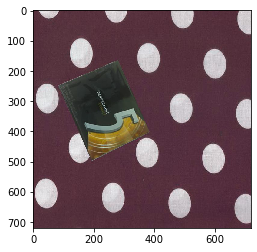

In [15]:
test_bb_image = 'data/candy/5 Peppermint Cobalt/5_peppermint_cobalt_0.jpg'
img_1 = cv2.imread(test_bb_image)
plt.imshow(img_1)

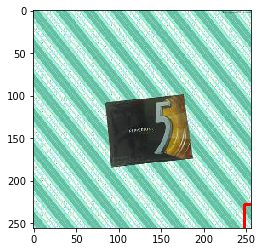

In [19]:
img_copy = img_1.copy()
# represents the top left corner of rectangle 
start_point = (248, 228) 
  
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (550, 550) 
  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(img_copy, start_point, end_point, color, thickness)
   
# Displaying the image  
plt.imshow(image)

In [20]:
512//16

32